# Run 'Streaming_SQL_for_Signal_Streamlit.ipynb' a while first, let it run in background

In [5]:
!pip install ipykernel>=4.1.2
!pip install pydeck
!pip install streamlit
!pip install pyngrok
import streamlit as st
import pandas as pd
import datetime as dt
import numpy as np

In [6]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///C:/Users/User/Desktop/CryptoDB.db')
#engine = create_engine('sqlite:///CryptoDB.db')
#path = "/content/drive/MyDrive/Colab_Notebooks/"

In [7]:
symbols = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"',
            engine).name.to_list()
symbols

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'XLMUSDT',
 'VETUSDT',
 'USDCUSDT',
 'CELRUSDT',
 'ENJUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'FTMUSDT',
 'BUSDUSDT',
 'EURUSDT',
 'LRCUSDT',
 'SCUSDT',
 'ADADOWNUSDT',
 'MANAUSDT',
 'JSTUSDT',
 'DOTUSDT',
 'LUNAUSDT',
 'DIAUSDT',
 'RUNEUSDT',
 'TRXUPUSDT',
 'AVAXUSDT',
 'NEARUSDT',
 'AVAUSDT',
 'REEFUSDT',
 'LITUSDT',
 'BADGERUSDT',
 'PONDUSDT',
 'LINAUSDT',
 'PERPUSDT',
 'TLMUSDT',
 'FORTHUSDT',
 'SHIBUSDT',
 'WAXPUSDT',
 'DYDXUSDT',
 'BETAUSDT',
 'DARUSDT',
 'CVXUSDT',
 'ACHUSDT',
 'ACAUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'HOTUSDT',
 'BATUSDT',
 'COTIUSDT',
 'SOLUSDT',
 'LINKUPUSDT',
 'AUDUSDT',
 'CRVUSDT',
 'SANDUSDT',
 'KLAYUSDT',
 'QNTUSDT',
 'MINAUSDT',
 'GALAUSDT',
 'ILVUSDT',
 'YGGUSDT',
 'ENSUSDT',
 'LTCUSDT',
 'TRXUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'DENTUSDT',
 'HBARUSDT',
 'KAVAUSDT',
 'FTTUSDT',
 'CHRUSDT',
 'KNCUSDT',
 'SNXUSDT',
 'ADAUPUSDT',
 'LINKDOWNUSDT',
 'SXPUSDT',
 'MKRUSDT',
 'STORJUSDT',
 'SUSHIUS

# No need to run Cells start with 'st.', they will be run in the last command together.

In [ ]:
#streamlit run C:/Users/User/anaconda3/Lib/site-packages/ipykernel_launcher.py [ARGUMENTS]
st.title('Welcome to the live Trading App platform')
#DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [8]:
def applyTechnicals(df):
  df['SMA_7'] = df.c.rolling(7).mean() # binance's existing two indicators
  df['SMA_25'] = df.c.rolling(25).mean()
  df.dropna(inplace=True)

In [9]:
def qry(symbol): 
  now = dt.datetime.utcnow()
  before = now - dt.timedelta(minutes=30)
  qry_str = f"""SELECT E,c FROM '{symbol}' WHERE E>='{before}'"""
  df = pd.read_sql(qry_str,engine)
  df.E = pd.to_datetime(df.E)
  df = df.set_index('E')
  df = df.resample('1min').last() #-- Or even resample("1ms")/('1min') depends on hardware --#
  df.dropna(inplace=True)     #-- Drop Missing data --#
  applyTechnicals(df)
  df['position'] = np.where(df['SMA_7']>df['SMA_25'], 1, 0)
  return df

In [10]:
qry('BTCUSDT')

2022-01-26 19:03:05.673 INFO    numexpr.utils: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-01-26 19:03:05.674 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,c,SMA_7,SMA_25,position
E,,,,
2022-01-26 10:57:00,37943.42,37881.145714,37822.6820,1
2022-01-26 10:58:00,38087.81,37915.988571,37835.3944,1
2022-01-26 10:59:00,37940.46,37932.897143,37840.6632,1
2022-01-26 11:00:00,38184.37,37980.730000,37857.3332,1
2022-01-26 11:01:00,38082.10,38007.518571,37869.7944,1


### Recall backtesting

In [11]:
#if df['SMA_7']>df['SMA_25']: 
#  print('SELL',qry('BTCUSDT').position.diff()[-4])
#elif df['SMA_7']<df['SMA_25']:
#  print('BUY')
#test = qry('BTCUSDT')
#test['position'] = np.where(test['SMA_7']<test['SMA_25'], test['position']+1, test['position'])
#test['position'] = np.where(test['SMA_7']>test['SMA_25'], test['position']-1, test['position'])
#test

In [12]:
def checkCorssSignal():  #backtesting
  for symbol in symbols:
    if len(qry(symbol).position) > 1: # at least two rows
       if qry(symbol).position[-1] and qry(symbol).position.diff()[-1]: #most recent cross detect
          st.write(symbol)


### No need to run↓

In [ ]:
st.button('Get live SMA cross', on_click = checkCorssSignal())

### 1. Downloaded this file as raw Python file .py for Dashboard display.
### 2. Named it to checkSMA.py, later We can edit this .py AND save, to change The Web-dashboard App display
### 3. Put it in my current Folder
# 4.***Open checkSMA.py file, comment'#'  ALL lines starting with 'get_ipython()'and '!', then save***
### 5. continue run below's command in .ipynb, The Web-dashboard App pop-up

In [ ]:
!streamlit run checkSMA.py

### The Web-dashboard Application:

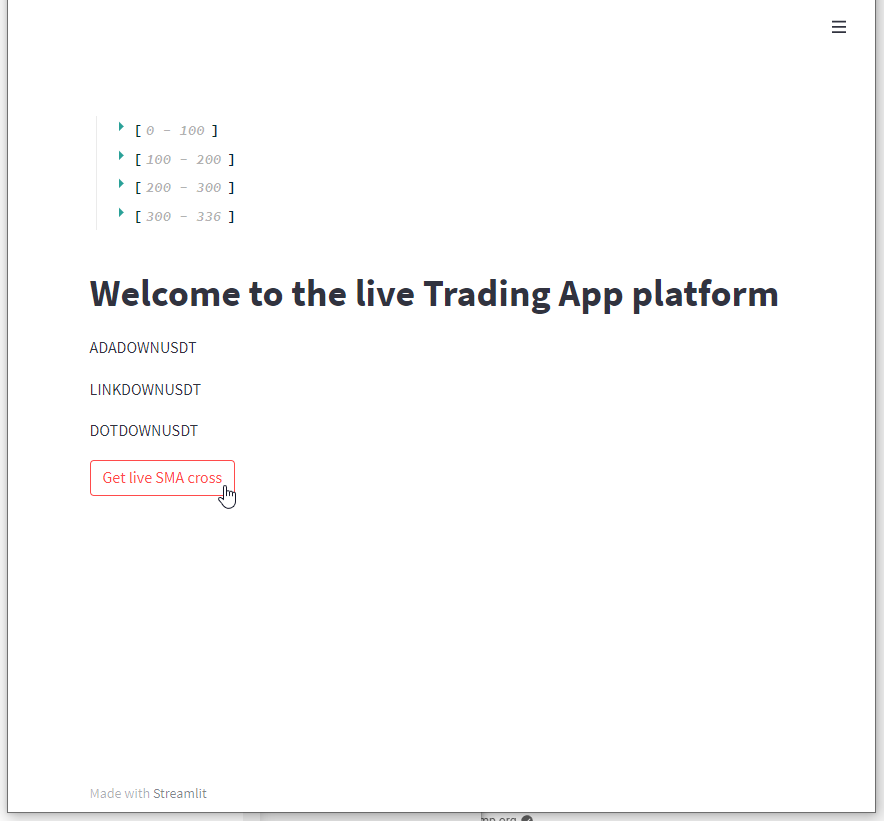